# Problem 1 Logistic Regression

## 1.1 Fit a logistic regression model

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression

class LogisticRegressionGD:
    def __init__(self, lr=0.01, fit_intercept=True, max_epoch=1e5, tolerance=1e-7, verbose=True):
        self.lr = lr
        self.fit_intercept = fit_intercept
        self.max_epoch = max_epoch
        self.tolerance = tolerance
        self.verbose = True

    def add_intercept(self, X):
        # add an extra column for the intercept
        intercept = np.ones([X.shape[0], 1])
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        # calculate the loss
        loss = -(1 / len(y)) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return loss

    def fit(self, X, y):
        '''
        Parameters
        ----------
        X : shape (n_samples, n_features)
            Training data
        y : shape (n_samples,)
            Target values, 1 or 0
        epochs : The number of epochs
        '''

        # initialize the parameters
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        # initialize the coefficients
        self.theta = np.zeros(X.shape[1])

        tol = 1e10
        n_epoch = 1
        while tol > self.tolerance and n_epoch <= self.max_epoch:
            old_theta = self.theta.copy()
            
            # TODO:
            # calculate predictions
            # pred.shape: [n_samples, 1]
            pred = self.sigmoid(X.dot(old_theta))
            
            # calculate gradients
            # grad.shape:  [n_features, 1]
            grad = np.matmul(X.T, (y - pred))
            grad = -grad / len(y)
            
            # update the coefficients
            self.theta = old_theta - self.lr * grad
            # END
            
            n_epoch += 1
            tol = np.sum(np.abs(self.theta - old_theta))

    def predict(self, X, threshold):
        """
        Parameters
        ----------
        X : shape (n_samples, n_features)
        threshold : threshold for make decision
        Returns
        -------
        y : shape (n_samples,)
            Predicted class label per sample, 1 or 0
        """
        # TODO
        
        # add the intercept to X
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        # get the prediction y
        y = np.zeros(X.shape[0], dtype=np.int)
        pred = self.sigmoid(X.dot(self.theta))
        y[pred>=threshold] = 1

        return y

In [10]:
# read the data
df_X = pd.read_csv('logistic_x.txt', sep='\ +', header=None, engine='python')
ys = pd.read_csv('logistic_y.txt', sep='\ +', header=None, engine='python')
ys = ys.astype(int)
ys.loc[ys[0] == -1,0] = 0
df_X['label'] = ys

In [11]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       99 non-null     float64
 1   1       99 non-null     float64
 2   label   99 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [12]:
# fit the model and print out the coefficients w
X = df_X[[0, 1]].values
y = df_X['label'].values
model = LogisticRegressionGD()
model.fit(X, y)

print(model.theta)

[-2.62004691  0.76026934  1.17191257]


## 1.2 Plot the training data and the decision boundary

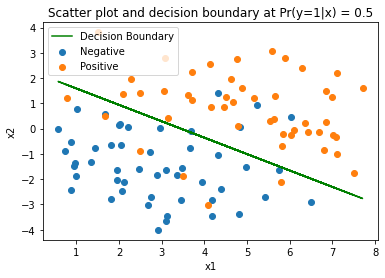

In [13]:
w = model.theta
x1 = X[:, 0]
x2 = - w[0]/w[2] - w[1] * x1 / w[2]
# plot the boundary
plt.plot(x1, x2, color='Green', label='Decision Boundary')
# plot the training data
neg_index = np.where(ys == 0)[0]
pos_index = np.where(ys == 1)[0]
negs = X[neg_index]
poss = X[pos_index]
plt.scatter(negs[:, 0], negs[:, 1], label='Negative')
plt.scatter(poss[:, 0], poss[:, 1], label='Positive')
plt.title("Scatter plot and decision boundary at Pr(y=1|x) = 0.5")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()